<a href="https://colab.research.google.com/github/sankethk1/Price-prediction-using-linear-regression-and-LSTM/blob/main/Prediction_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pylab import rcParams
import math

In [ ]:

from google.colab import files


uploaded = files.upload()

Saving titan_lstm.csv to titan_lstm.csv


In [ ]:
df = pd.read_csv('titan_lstm.csv')

In [ ]:
df.head()

,date,Price,Open,High,Low,Chg%
0,01-01-2014,230.80,230.0,232.50,229.35,0.01
1,02-01-2014,226.35,229.5,235.95,225.10,-0.02
2,03-01-2014,227.40,226.0,228.75,224.00,0.00
3,06-01-2014,227.80,228.0,230.30,225.55,0.00
4,07-01-2014,226.05,230.0,230.90,224.80,-0.01


In [ ]:
df.loc[:, 'Date'] = pd.to_datetime(df['date'],format='%d-%m-%Y')

In [ ]:
df.head()

,date,Price,Open,High,Low,Chg%,Date
0,01-01-2014,230.80,230.0,232.50,229.35,0.01,2014-01-01
1,02-01-2014,226.35,229.5,235.95,225.10,-0.02,2014-01-02
2,03-01-2014,227.40,226.0,228.75,224.00,0.00,2014-01-03
3,06-01-2014,227.80,228.0,230.30,225.55,0.00,2014-01-06
4,07-01-2014,226.05,230.0,230.90,224.80,-0.01,2014-01-07


In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
df.head(10)

,date,Price,Open,High,Low,Chg%,Date,month
0,01-01-2014,230.80,230.00,232.50,229.35,0.01,2014-01-01,1
1,02-01-2014,226.35,229.50,235.95,225.10,-0.02,2014-01-02,1
2,03-01-2014,227.40,226.00,228.75,224.00,0.00,2014-01-03,1
3,06-01-2014,227.80,228.00,230.30,225.55,0.00,2014-01-06,1
4,07-01-2014,226.05,230.00,230.90,224.80,-0.01,2014-01-07,1
5,08-01-2014,222.75,226.90,226.95,222.10,-0.01,2014-01-08,1
6,09-01-2014,223.85,225.15,227.45,221.40,0.00,2014-01-09,1
7,10-01-2014,220.25,224.00,227.25,219.00,-0.02,2014-01-10,1
8,13-01-2014,221.10,221.00,223.40,214.10,0.00,2014-01-13,1
9,14-01-2014,221.00,221.25,222.40,220.00,0.00,2014-01-14,1


KeyError: ignored

In [ ]:
len(df.Price)

2032

In [ ]:
df.drop([1997,1998,1999],axis=0,inplace=True)

In [ ]:
df["Price"]=df["Price"].astype(float)

In [ ]:
df.drop([2031,2030,2029,2028,2027,2026,2025,2024,2023,2022,2021,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000],axis=0,inplace=True)

In [ ]:
df.drop([2020],axis=0,inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of             date    Price     Open     High      Low  Chg%       Date  month
0     01-01-2014   230.80   230.00   232.50   229.35  0.01 2014-01-01      1
1     02-01-2014   226.35   229.50   235.95   225.10 -0.02 2014-01-02      1
2     03-01-2014   227.40   226.00   228.75   224.00  0.00 2014-01-03      1
3     06-01-2014   227.80   228.00   230.30   225.55  0.00 2014-01-06      1
4     07-01-2014   226.05   230.00   230.90   224.80 -0.01 2014-01-07      1
...          ...      ...      ...      ...      ...   ...        ...    ...
1992  01-02-2022  2523.90  2631.00  2634.00  2518.00 -0.04 2022-02-01      2
1993  02-02-2022  2535.90  2536.50  2545.55  2483.00  0.00 2022-02-02      2
1994  03-02-2022  2538.80  2550.00  2559.00  2525.30  0.00 2022-02-03      2
1995  04-02-2022  2523.15  2556.30  2565.75  2510.00 -0.01 2022-02-04      2
1996  07-02-2022  2536.15  2525.25  2545.40  2519.95  0.01 2022-02-07      2

[1997 rows x 8 columns]>

Text(0, 0.5, 'INR')

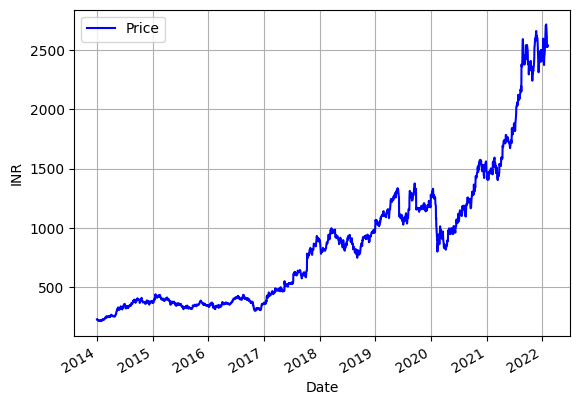

In [ ]:

ax = df.plot(x='Date', y='Price', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("INR")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cv_size = 0.2
test_size  = 0.1

In [ ]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1399
num_cv = 399
num_test = 199
train.shape = (1399, 8)
cv.shape = (399, 8)
train_cv.shape = (1798, 8)
test.shape = (199, 8)


Text(0, 0.5, 'INR')

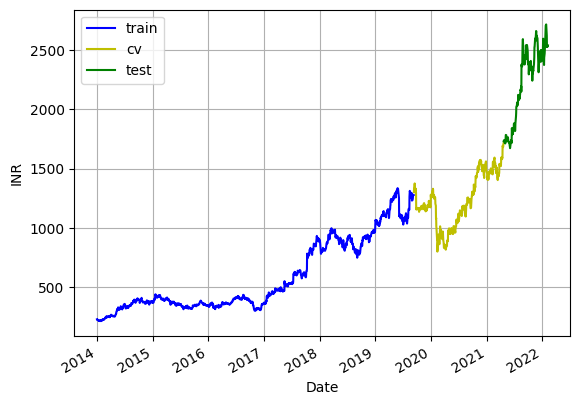

In [ ]:
ax = train.plot(x='Date', y='Price', style='b-', grid=True)
ax = cv.plot(x='Date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Price', style='g-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("INR")

In [ ]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):

    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['Price'])):
        X_train = np.array(range(len(df['Price'][i-N:i]))) # e.g. [0 1 2 3 4]
        y_train = np.array(df['Price'][i-N:i]) # e.g. [2944 3088 3226 3335 3436]
        X_train = X_train.reshape(-1, 1)     # e.g X_train =
                                             # [[0]
                                             #  [1]
                                             #  [2]
                                             #  [3]
                                             #  [4]]

        y_train = y_train.reshape(-1, 1)

        regr.fit(X_train, y_train)
        pred = regr.predict(np.array(N).reshape(1,-1))

        pred_list.append(pred[0][0])


    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min

    return pred_list



In [ ]:
def get_mape(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
N_max = 30
RMSE = []
R2 = []
mape = []
for N in range(1, N_max+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_lin_reg(train_cv, 'Price', N, 0, num_train)

    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['Price'])))
    R2.append(r2_score(cv['Price'], est_list))
    mape.append(get_mape(cv['Price'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

RMSE = [27.15236838698526, 39.618714249669864, 32.437250070667744, 32.344812519627084, 32.789738001897526, 33.636294411756865, 34.726819796754434, 35.29217060148627, 36.003055250251215, 37.01375951642045, 38.03420815556053, 39.27318583829088, 40.54001205959965, 41.721458747805784, 43.10614790314197, 44.43089195568855, 45.90363615678057, 47.26074580047247, 48.533795380454876, 49.663558164456546, 50.70330009116683, 51.7556906360186, 52.84421906363209, 53.87365966668755, 54.91873002059669, 55.9667970673301, 57.01197837575616, 58.061571711491155, 59.10789545235604, 60.152238235471756]
R2 = [0.9841661387499928, 0.9662889596901467, 0.977402548739135, 0.97753115869907, 0.9769087579583693, 0.9757010397448623, 0.9740999008106854, 0.9732497318215928, 0.9721612254250269, 0.9705762651452355, 0.9689315091156994, 0.9668744066834214, 0.9647028900686445, 0.962615603877521, 0.9600929311900147, 0.9576023813601364, 0.9547451033287557, 0.9520296881312617, 0.9494105555684056, 0.9470279154594916, 0.94478668

,date,Price,Open,High,Low,Chg%,Date,month,est_N1,est_N2,...,est_N21,est_N22,est_N23,est_N24,est_N25,est_N26,est_N27,est_N28,est_N29,est_N30
1399,12-09-2019,1300.60,1278.00,1305.00,1274.05,0.02,2019-09-12,9,1277.05,1279.55,...,1283.079286,1289.915584,1297.218182,1305.808696,1311.1250,1315.970308,1320.918661,1325.938095,1330.384236,1332.077126
1400,13-09-2019,1329.45,1300.45,1336.80,1294.50,0.02,2019-09-13,9,1300.60,1324.15,...,1281.644286,1288.961688,1295.362253,1302.283152,1310.5075,1315.651385,1320.377208,1325.230159,1330.176601,1334.591034
1401,16-09-2019,1348.65,1331.95,1366.35,1327.05,0.01,2019-09-16,9,1329.45,1358.30,...,1283.939286,1292.286364,1298.907708,1304.748188,1311.1650,1318.905846,1323.751282,1328.235317,1332.876232,1337.638391
1402,17-09-2019,1374.55,1364.00,1379.00,1350.65,0.02,2019-09-17,9,1348.65,1367.85,...,1286.659286,1297.133117,1304.605731,1310.542754,1315.8180,1321.717846,1328.958405,1333.473413,1337.680172,1342.072529
1403,18-09-2019,1335.00,1378.90,1389.95,1331.15,-0.03,2019-09-18,9,1374.55,1400.45,...,1303.606429,1303.468831,1312.792490,1319.392754,1324.6260,1329.304462,1334.651140,1341.353571,1345.488300,1349.365977


(2.0, 30.0)

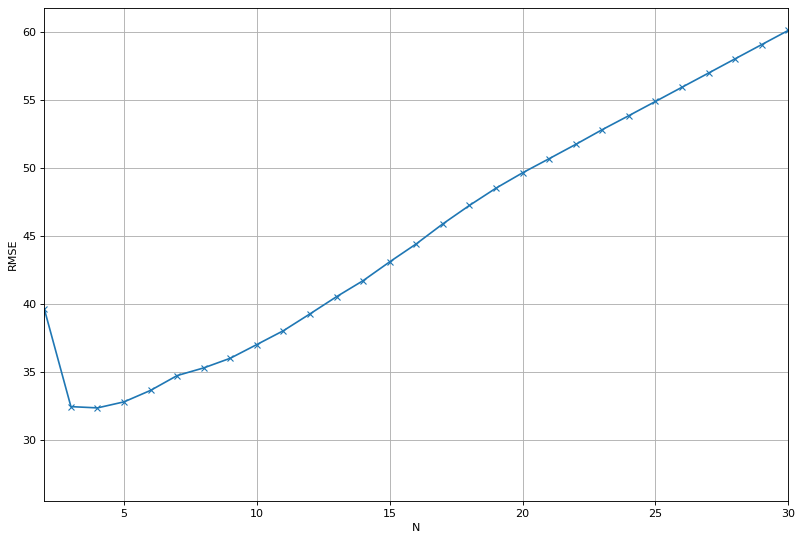

In [ ]:

plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 30])

Text(0, 0.5, 'R2')

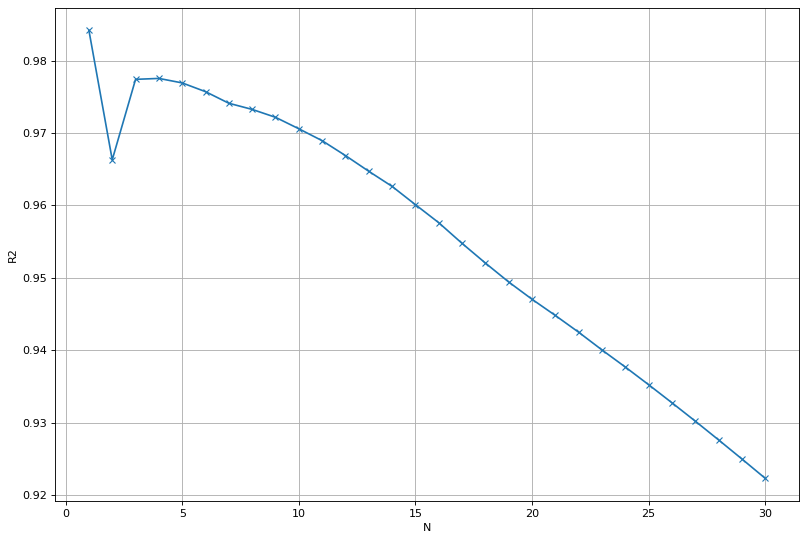

In [ ]:

plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')

Text(0, 0.5, 'MAPE')

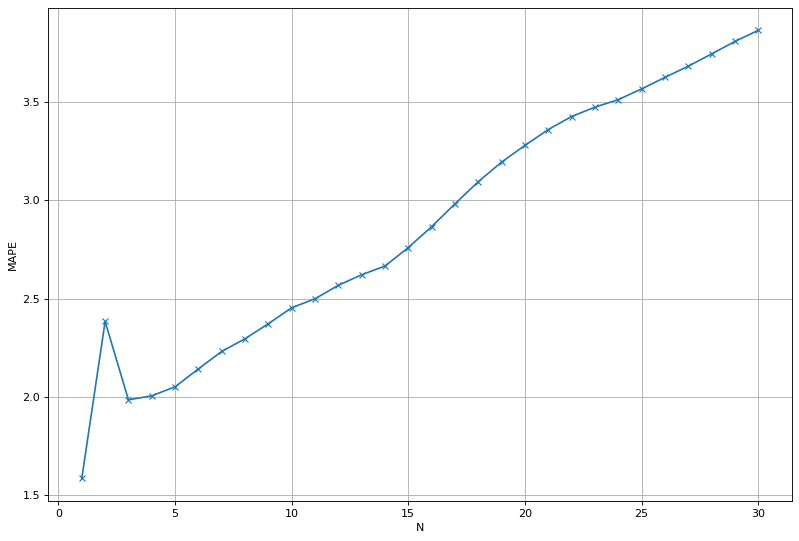

In [ ]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, N_max+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')

In [ ]:
from datetime import date, datetime, time, timedelta

TypeError: ignored

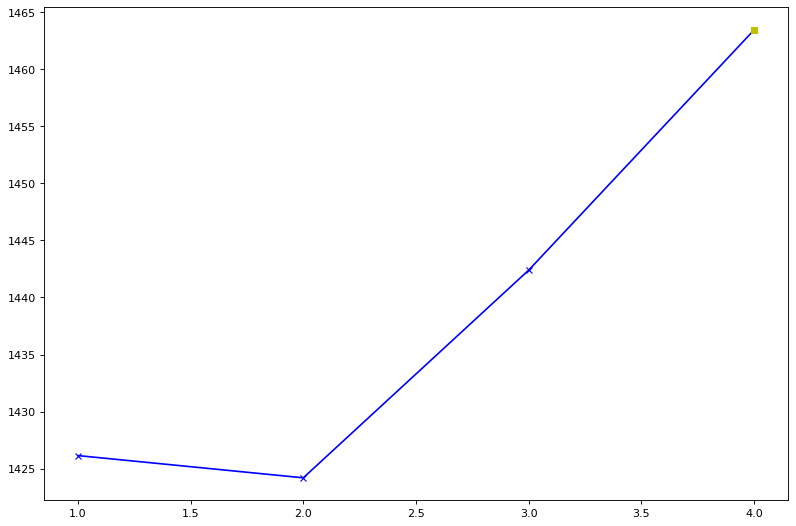

In [ ]:
day = pd.Timestamp(date(2020, 10, 31))

# Specify the maximum N you want to plot (If Nmax2 is too large it gets very cluttered)
N_max2 = 3

df_temp = cv[cv['Date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,N_max2+2), df_temp[-N_max2-1:]['Price'], 'bx-')
plt.plot(N_max2+1, df_temp[-1:]['Price'], 'ys-')
legend_list = ['Price', 'actual_value']

# Plot the linear regression lines and the predictions
color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True) # Create linear regression object
for N in range(3, N_max2+1):
    # Plot the linear regression lines
    X_train = np.array(range(len(df_temp['Price'][-N-1:-1]))) # e.g. [0 1 2 3 4]
    y_train = np.array(df_temp['Price'][-N-1:-1]) # e.g. [2944 3088 3226 3335 3436]
    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            # Train the model
    y_est = regr.predict(X_train)         # Get linear regression line
    plt.plot(range(N_max2+1-N,N_max2+2),
             np.append((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)],
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')

    # Plot the predictions
    plt.plot(N_max2+1,
             df_temp['est_N'+str(N)][-1:],
             color=color_list[N%len(color_list)],
             marker='o')
    legend_list.append('est_N'+str(N))


plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))

Text(0, 0.5, 'INR')

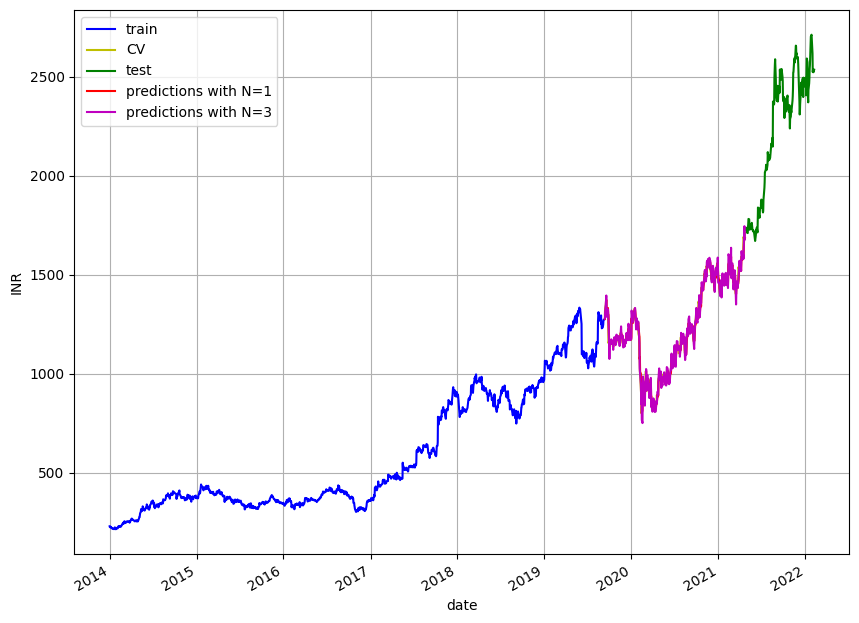

In [ ]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='Date', y='Price', style='b-', grid=True)
ax = cv.plot(x='Date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Price', style='g-', grid=True, ax=ax)
ax = cv.plot(x='Date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='Date', y='est_N3', style='m-', grid=True, ax=ax)
ax.legend(['train', 'CV', 'test', 'predictions with N=1', 'predictions with N=3'])
ax.set_xlabel("date")
ax.set_ylabel("INR")

Text(0.5, 1.0, 'Zoom in to dev set')

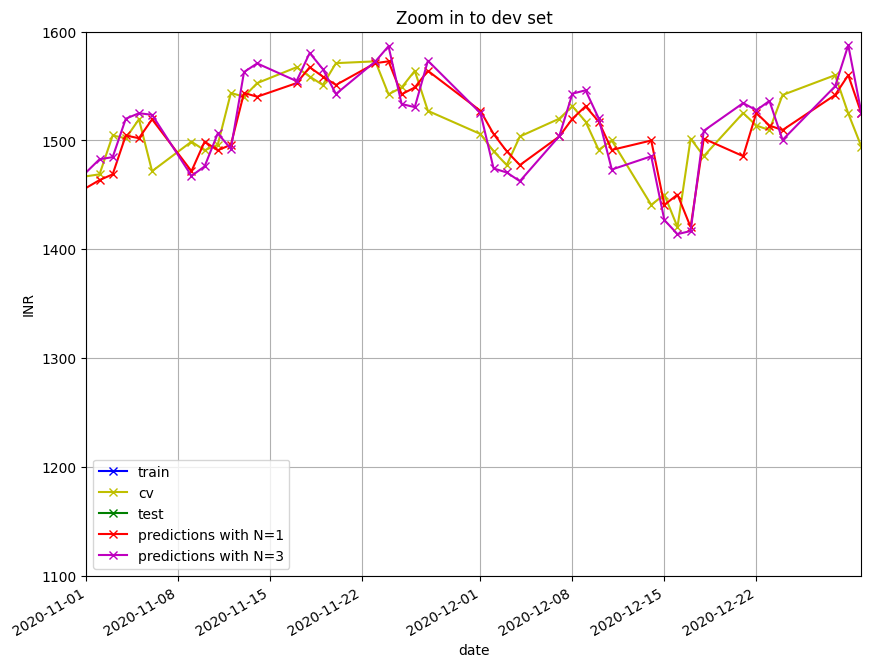

In [ ]:


ax = train.plot(x='Date', y='Price', style='bx-', grid=True)
ax = cv.plot(x='Date', y='Price', style='yx-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Price', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='Date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='Date', y='est_N3', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test', 'predictions with N=1', 'predictions with N=3'])
ax.set_xlabel("date")
ax.set_ylabel("INR")
ax.set_xlim([date(2020, 11, 1), date(2020, 12, 30)])
ax.set_ylim([1100, 1600])
ax.set_title('Zoom in to dev set')

In [ ]:
est_list = get_preds_lin_reg(df, 'Price', 3, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(3)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['Price'])))
print("R2 = %0.3f" % r2_score(test['Price'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['Price'], est_list))
test.head()

RMSE = 53.473
R2 = 0.972
MAPE = 1.745%


,date,Price,Open,High,Low,Chg%,Date,month,est_N3
1798,23-04-2021,1730.75,1714.95,1739.90,1696.15,0.01,2021-04-23,4,1725.366667
1799,26-04-2021,1738.65,1741.40,1745.85,1722.20,0.00,2021-04-26,4,1755.100000
1800,27-04-2021,1728.45,1736.55,1743.00,1724.55,-0.01,2021-04-27,4,1753.450000
1801,28-04-2021,1734.80,1728.45,1740.00,1713.00,0.00,2021-04-28,4,1730.316667
1802,29-04-2021,1723.40,1748.00,1748.95,1719.60,-0.01,2021-04-29,4,1730.116667


LAST VALUE is nothing but N = 1

In [ ]:
est_list = get_preds_lin_reg(df, 'Price', 1, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(3)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['Price'])))
print("R2 = %0.3f" % r2_score(test['Price'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['Price'], est_list))
test.head()

RMSE = 43.291
R2 = 0.982
MAPE = 1.316%


,date,Price,Open,High,Low,Chg%,Date,month,est_N3
1798,23-04-2021,1730.75,1714.95,1739.90,1696.15,0.01,2021-04-23,4,1712.50
1799,26-04-2021,1738.65,1741.40,1745.85,1722.20,0.00,2021-04-26,4,1730.75
1800,27-04-2021,1728.45,1736.55,1743.00,1724.55,-0.01,2021-04-27,4,1738.65
1801,28-04-2021,1734.80,1728.45,1740.00,1713.00,0.00,2021-04-28,4,1728.45
1802,29-04-2021,1723.40,1748.00,1748.95,1719.60,-0.01,2021-04-29,4,1734.80


Text(0, 0.5, 'INR')

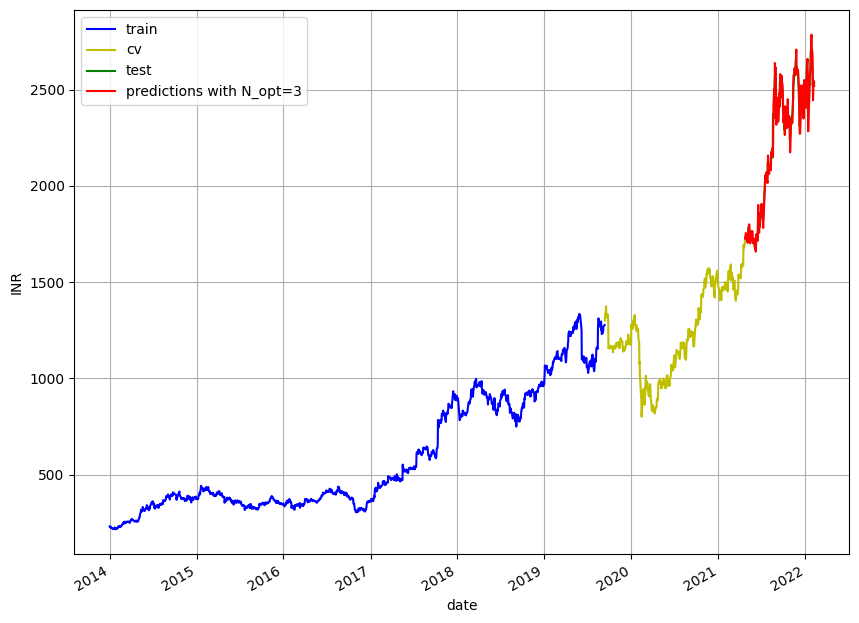

In [ ]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='Date', y='Price', style='b-', grid=True)
ax = cv.plot(x='Date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Price', style='g-', grid=True, ax=ax)
ax = test.plot(x='Date', y='est_N3', style='r-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test', 'predictions with N_opt=3'])
ax.set_xlabel("date")
ax.set_ylabel("INR")

Prediction using LSTM network

In [ ]:
def get_final_data(data, N, offset):

    x, y = [], []
    for i in range(offset, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x = np.array(x)
    y = np.array(y)

    return x, y

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train['Price']).reshape(-1,1))
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))

# Split into x and y
x_train_scaled, y_train_scaled = get_final_data(train_scaled, N, N)
print("x_train_scaled.shape = " + str(x_train_scaled.shape)) # (446, 7, 1)
print("y_train_scaled.shape = " + str(y_train_scaled.shape)) # (446, 1)

scaler.mean_ = [584.0808792]
scaler.var_ = [89997.96325663]
x_train_scaled.shape = (1396, 3, 1)
y_train_scaled.shape = (1396, 1)


In [ ]:
lstm_units = 50
prob = 0.5
epochs = 10
batch = 5

In [ ]:
model = Sequential()
model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train_scaled.shape[1],1)))
model.add(Dropout(prob)) # Add dropout with a probability of 0.5
model.add(LSTM(units=lstm_units))
model.add(Dropout(prob)) # Add dropout with a probability of 0.5
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch, verbose=2)

Epoch 1/10
280/280 - 6s - loss: 0.1354 - 6s/epoch - 20ms/step
Epoch 2/10
280/280 - 2s - loss: 0.0364 - 2s/epoch - 6ms/step
Epoch 3/10
280/280 - 2s - loss: 0.0387 - 2s/epoch - 7ms/step
Epoch 4/10
280/280 - 2s - loss: 0.0396 - 2s/epoch - 7ms/step
Epoch 5/10
280/280 - 2s - loss: 0.0326 - 2s/epoch - 6ms/step
Epoch 6/10
280/280 - 2s - loss: 0.0342 - 2s/epoch - 6ms/step
Epoch 7/10
280/280 - 2s - loss: 0.0333 - 2s/epoch - 6ms/step
Epoch 8/10
280/280 - 2s - loss: 0.0327 - 2s/epoch - 6ms/step
Epoch 9/10
280/280 - 2s - loss: 0.0318 - 2s/epoch - 6ms/step
Epoch 10/10
280/280 - 2s - loss: 0.0326 - 2s/epoch - 7ms/step


In [ ]:

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 3, 50)             10400     
                                                                 
 dropout_17 (Dropout)        (None, 3, 50)             0         
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scaler_final = StandardScaler()
train_cv_scaled_final = scaler_final.fit_transform(np.array(train_cv['Price']).reshape(-1,1))
print("scaler_final.mean_ = " + str(scaler_final.mean_))
print("scaler_final.var_ = " + str(scaler_final.var_))

scaler_final.mean_ = [728.97588988]
scaler_final.var_ = [153971.39534056]


In [ ]:
def scaled_x_y(data, N, offset):

    x_scaled, y, mean_list, std_list = [], [], [], []
    for i in range(offset, len(data)):
        mean_list.append(np.mean(data[i-N:i]))
        std_list.append(np.std(data[i-N:i]))
        x_scaled.append((data[i-N:i]-mean_list[i-offset])/std_list[i-offset])
        y.append(data[i])
    x_scaled = np.array(x_scaled)
    y = np.array(y)

    return x_scaled, y, mean_list, std_list

In [ ]:
x_cv_scaled, y_cv, mean_cv_list, std_cv_list = scaled_x_y(np.array(train_cv['Price']).reshape(-1,1), N, num_train)
print("x_cv_scaled.shape = " + str(x_cv_scaled.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("len(mean_cv_list) = " + str(len(mean_cv_list)))
print("len(std_cv_list) = " + str(len(std_cv_list)))

x_cv_scaled.shape = (399, 3, 1)
y_cv.shape = (399, 1)
len(mean_cv_list) = 399
len(std_cv_list) = 399


In [ ]:
x_test_scaled, y_test, mean_test_list, std_test_list = scaled_x_y(np.array(df['Price']).reshape(-1,1), N, num_train+num_cv)
print("x_test_scaled.shape = " + str(x_test_scaled.shape))
print("y_test.shape = " + str(y_test.shape))
print("len(mean_test_list) = " + str(len(mean_test_list)))
print("len(std_test_list) = " + str(len(std_test_list)))

x_test_scaled.shape = (199, 3, 1)
y_test.shape = (199, 1)
len(mean_test_list) = 199
len(std_test_list) = 199


In [ ]:
#prediction on cv
est_scaled = model.predict(x_cv_scaled)
est = (est_scaled * np.array(std_cv_list).reshape(-1,1)) + np.array(mean_cv_list).reshape(-1,1)
print("est.shape = " + str(est.shape))


# Calculate MAPE
mape_pct_bef_tuning = get_mape(y_cv, est)
print("MAPE = %0.3f%%" % mape_pct_bef_tuning)


13/13 [==============================] - 0s 7ms/step
est.shape = (399, 1)
MAPE = 2.288%
